In [ ]:
pip install imbalanced-learn

In [ ]:
# Check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.10.1


In [ ]:
# Importing packages
import numpy as np
from numpy import where
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
# Importing and cleaning the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [ ]:
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [ ]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [ ]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

Counter({1: 210, 0: 51})


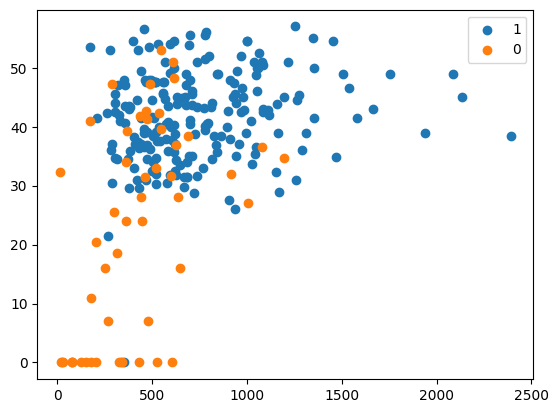

In [ ]:
counter = Counter(y_train)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestClassifier(random_state = 1,
                                  n_estimators = 1000,
                                  max_features = 'auto',
                                  max_depth = 50,
                                  bootstrap = False,
                                  min_samples_split = 2,  min_samples_leaf = 1)
model = forest.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate(forest, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [ ]:
base_accuracy = evaluate(forest, X_test, y_test)

Model Performance
Average Error: 0.0667 degrees.
Accuracy = 93.33%.


Counter({1: 210, 0: 210})


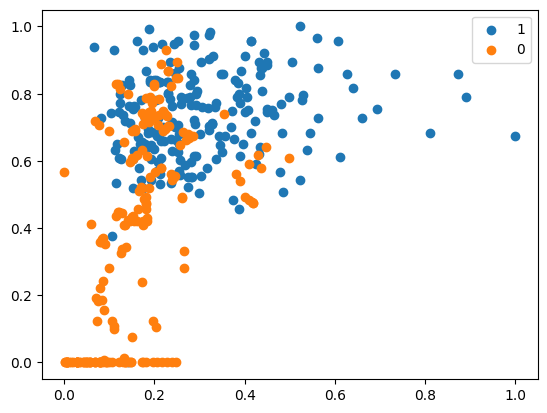

In [ ]:
counter = Counter(y_train)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [ ]:
print(y_test)
print(y_pred_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9333333333333333

Recall metric in the testing dataset: 97.82608695652173%


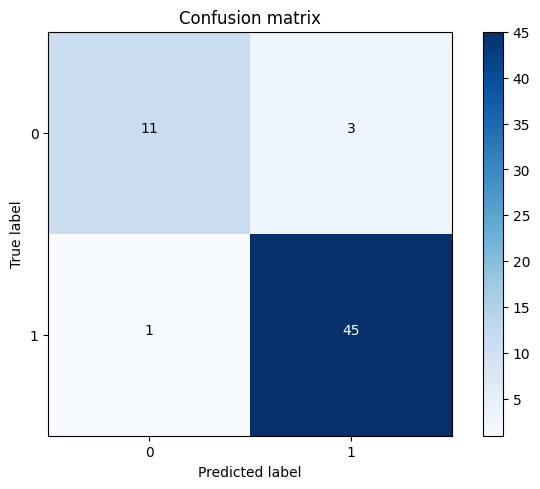

In [ ]:
# Classificaton report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test,  y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test,  y_pred_test)

array([[11,  3],
       [ 1, 45]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        46

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



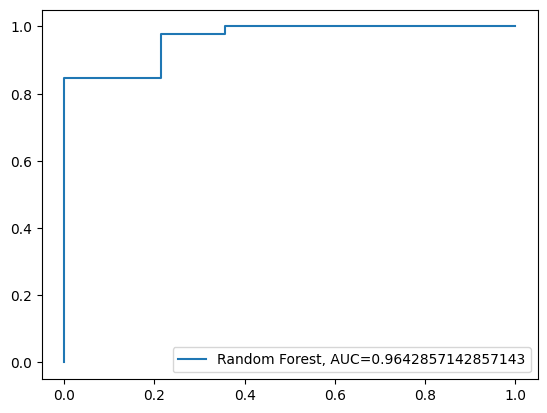

In [ ]:
# Import the metrics class
from sklearn import metrics

y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

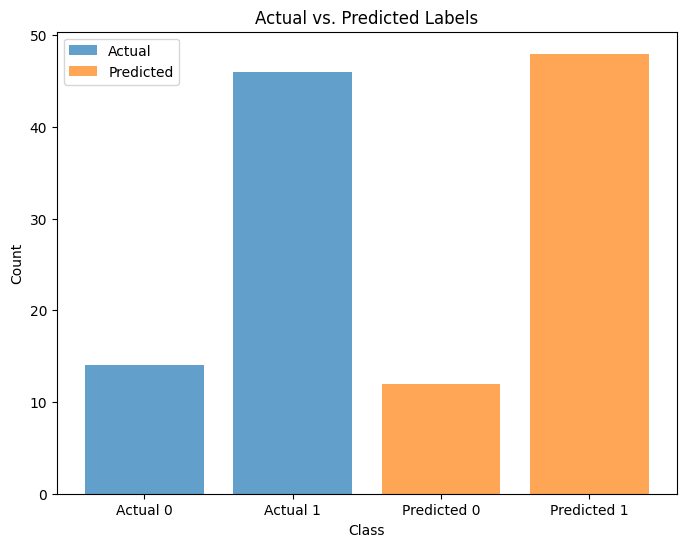

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart comparing predicted vs. actual labels
plt.figure(figsize=(8, 6))
plt.bar(["Actual 0", "Actual 1"], [sum(y_test == 0), sum(y_test == 1)], label="Actual", alpha=0.7)
plt.bar(["Predicted 0", "Predicted 1"], [sum(y_pred_test == 0), sum(y_pred_test == 1)], label="Predicted", alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Actual vs. Predicted Labels")
plt.legend()
plt.show()


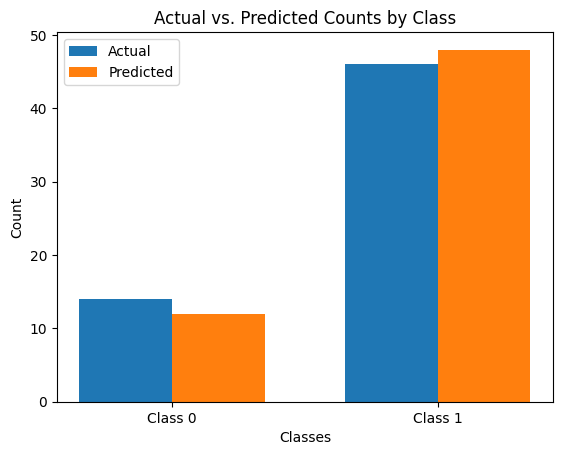

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classes (you can customize these class labels)
class_labels = ["Class 0", "Class 1"]

# Count the occurrences of each class in y_test and y_pred_test
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_test)

# Create an array of class labels for the x-axis
x_labels = np.arange(len(class_labels))

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis
fig, ax = plt.subplots()

# Create bars for actual and predicted counts
actual_bars = ax.bar(x_labels - bar_width/2, actual_counts, bar_width, label='Actual')
predicted_bars = ax.bar(x_labels + bar_width/2, predicted_counts, bar_width, label='Predicted')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Actual vs. Predicted Counts by Class')
ax.set_xticks(x_labels)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()


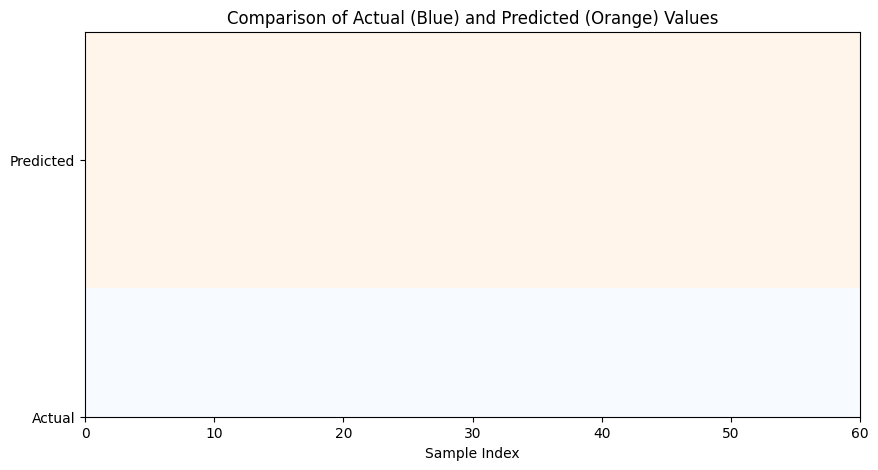

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a grid of ones for actual values
actual_grid = np.ones_like(y_test)

# Create a grid of zeros for predicted values
predicted_grid = np.zeros_like(y_pred_test)

# Plot the actual values in blue
ax.imshow(actual_grid.reshape(1, -1), cmap='Blues', aspect='auto', extent=[0, len(y_test), 0, 1])

# Plot the predicted values in orange
ax.imshow(predicted_grid.reshape(1, -1), cmap='Oranges', aspect='auto', extent=[0, len(y_test), 1, 2])

# Set y-axis labels
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['Actual', 'Predicted'])

# Set x-axis label
ax.set_xlabel('Sample Index')

# Set the title
ax.set_title('Comparison of Actual (Blue) and Predicted (Orange) Values')

# Show the plot
plt.show()


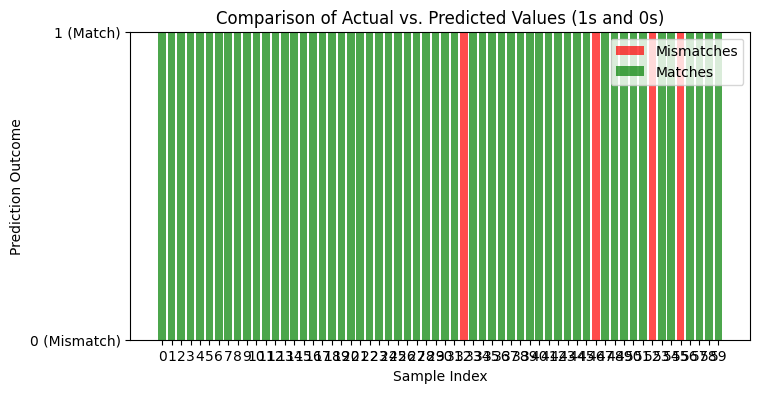

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values (replace with your own)
y_test = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0, 0])
y_pred_test = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0 ,0 ,0])

# Create an array to represent matches (where actual and predicted values are the same)
matches = (y_test == y_pred_test)

# Create an array to represent mismatches
mismatches = (y_test != y_pred_test)

# Calculate the total number of samples
total_samples = len(y_test)

# Calculate the number of matches and mismatches
num_matches = np.sum(matches)
num_mismatches = np.sum(mismatches)

# Create a stacked bar chart
plt.figure(figsize=(8, 4))
plt.bar(range(total_samples), mismatches, color='red', label='Mismatches', alpha=0.7)
plt.bar(range(total_samples), matches, color='green', label='Matches', bottom=mismatches, alpha=0.7)

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Prediction Outcome')
plt.title('Comparison of Actual vs. Predicted Values (1s and 0s)')
plt.xticks(range(total_samples))
plt.yticks([0, 1], ['0 (Mismatch)', '1 (Match)'])
plt.legend(loc='upper right')

# Show the plot
plt.show()
